<a href="https://colab.research.google.com/github/vjnbarot/TXST-Projects/blob/main/MachineLearningApproachtoHeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Approach to Heart Disease Prediction

This study focuses on a machine learning approach to predicting coronary heart disease (CAD) in patients referred to the Cleveland Clinic for Coronary Heart Disease between 1981 and 1984. Machine learning models were fine-tuned and implemented to find the optimal model for predicting the presence (1) or absence (0) of CHD in patients utilizing various predictors including patient demographics and health indicators. Results show that logistic regression and Random Forest Bagged models both perform well when prioritizing balanced recall values, followed by good accuracy and precision. Our findings are limited by the data utilized, which focused on a specific Cleveland demographic and limited data. Nonetheless, the insights of this research contribute to the overall mission of facilitating early detection and prevention of heart disease to reduce healthcare costs and improve survival rates.

# Package and Data Import

## Import Packages

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


from sklearn.model_selection import cross_val_score


## Access Dataset from UCI Machine Learning Repository

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y into one DataFrame
heart_disease_df = pd.concat([X, y], axis=1)

# variable information
display(heart_disease.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Dataset contains 12 features based on the analysis of individuals visiting the cleveland heart clinic upon referral. They were evaluated for heart disease by a specialist and given a score ('num') to indicate if disease was present along with the severity on a scale of 0 to 4 with 0 indicating no presence and 4 being the most severe.

# Data Cleaning

## Missing Values

In [ ]:
# Count missing values in each column
missing_counts = heart_disease_df.isnull().sum()

# Total number of missing values across the entire DataFrame
total_missing = missing_counts.sum()

print(f"Total missing values: {total_missing}")

# Drop rows with any missing values
heart_disease_df_cleaned = heart_disease_df.dropna()

# Print some info to verify
print(f"Original shape: {heart_disease_df.shape}")
print(f"Cleaned shape: {heart_disease_df_cleaned.shape}")


Total missing values: 6
Original shape: (303, 14)
Cleaned shape: (297, 14)


6 records were found to have missing values and were dropped (1.7% of original dataset)

In [ ]:
# Display information about each column
print(heart_disease_df_cleaned.info())

# Alternatively, describe each column statistically
print(heart_disease_df_cleaned.describe(include='all').round(2))


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB
None
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  297.00  297.00  297.00    297.00  297.00  297.00   297.00   297.00   
mean    54.54    0.68    3.16    131.69  247.35    0.14     1.00 

## Correct data types

In [ ]:
#Change columns to categorical based on original data.

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
  heart_disease_df_cleaned[col] = heart_disease_df_cleaned[col].astype('category')

# Print info again to see the changes
print(heart_disease_df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    float64 
 12  thal      297 non-null    category
 13  num       297 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 21.5 KB
None


<ipython-input-6-e8600a6a59ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_df_cleaned[col] = heart_disease_df_cleaned[col].astype('category')


# Exploratory Data Analysis

## Review of Numeric Inputs
- Review for distribution
- Review for spread
- Review for outliers

All distributions are fairly normally distributed except for the old peak

## Check if the dataset is balanced

In [ ]:
# Create a binary target variable based on whether 'num' is greater than 0
heart_disease_df_cleaned['target'] = (heart_disease_df_cleaned['num'] > 0).astype(int)

# Drop the Num as it is not needed
heart_disease_df_cleaned = heart_disease_df_cleaned.drop('num', axis=1)

print("Raw counts of target")
print(heart_disease_df_cleaned['target'].value_counts())

print("\n"*3)
print("% composition of target")
print(heart_disease_df_cleaned['target'].value_counts(normalize=True) * 100)


Raw counts of target
target
0    160
1    137
Name: count, dtype: int64




% composition of target
target
0    53.872054
1    46.127946
Name: proportion, dtype: float64


<ipython-input-7-aac54603f5b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_df_cleaned['target'] = (heart_disease_df_cleaned['num'] > 0).astype(int)


-
-
-
-
Data set is blanaced so we will not perform under/over sampling
-
-
-
-
-

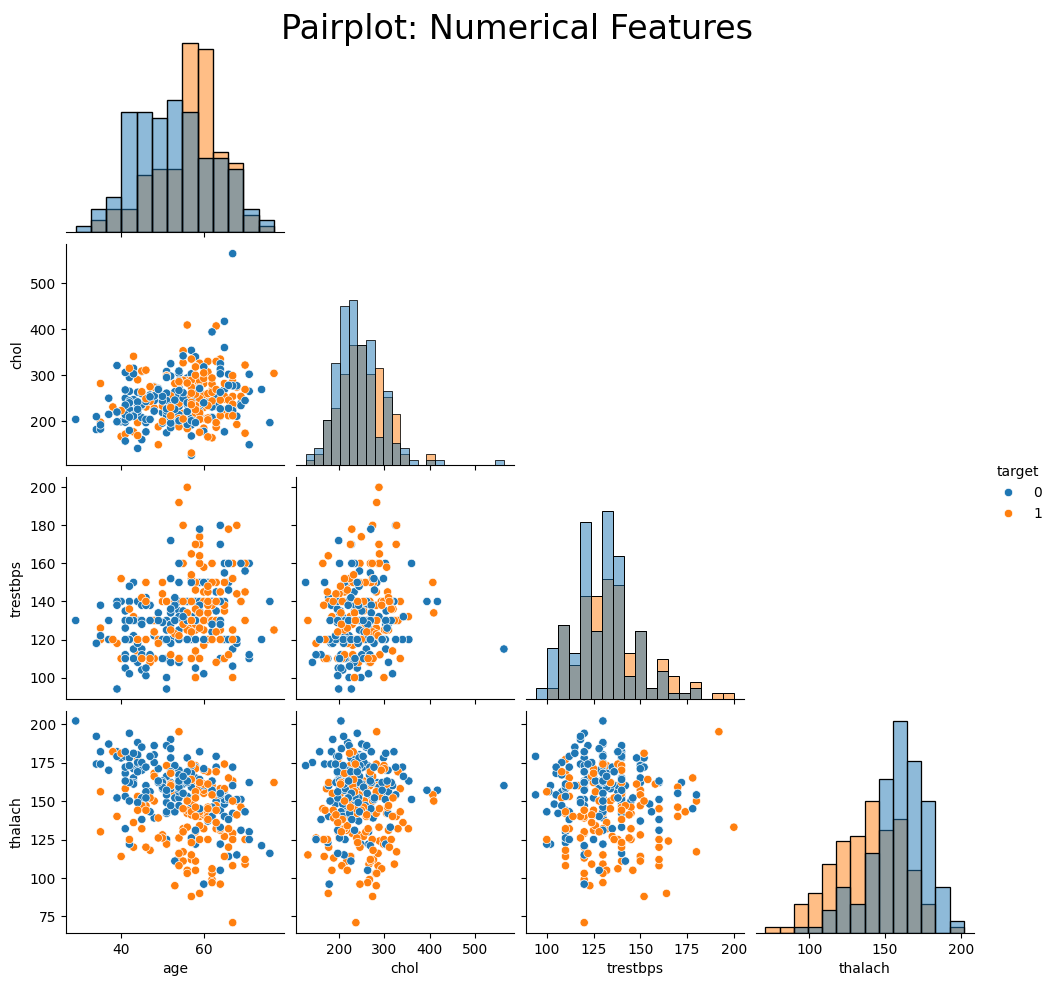

In [ ]:
## Create the pariplot for display of the distribution and see if there is any correlation

sns.pairplot(heart_disease_df_cleaned[['age', 'chol', 'trestbps', 'thalach', 'target']], corner = True, hue = 'target', diag_kind='hist')
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24)
plt.show()

# Review Categorical Variables


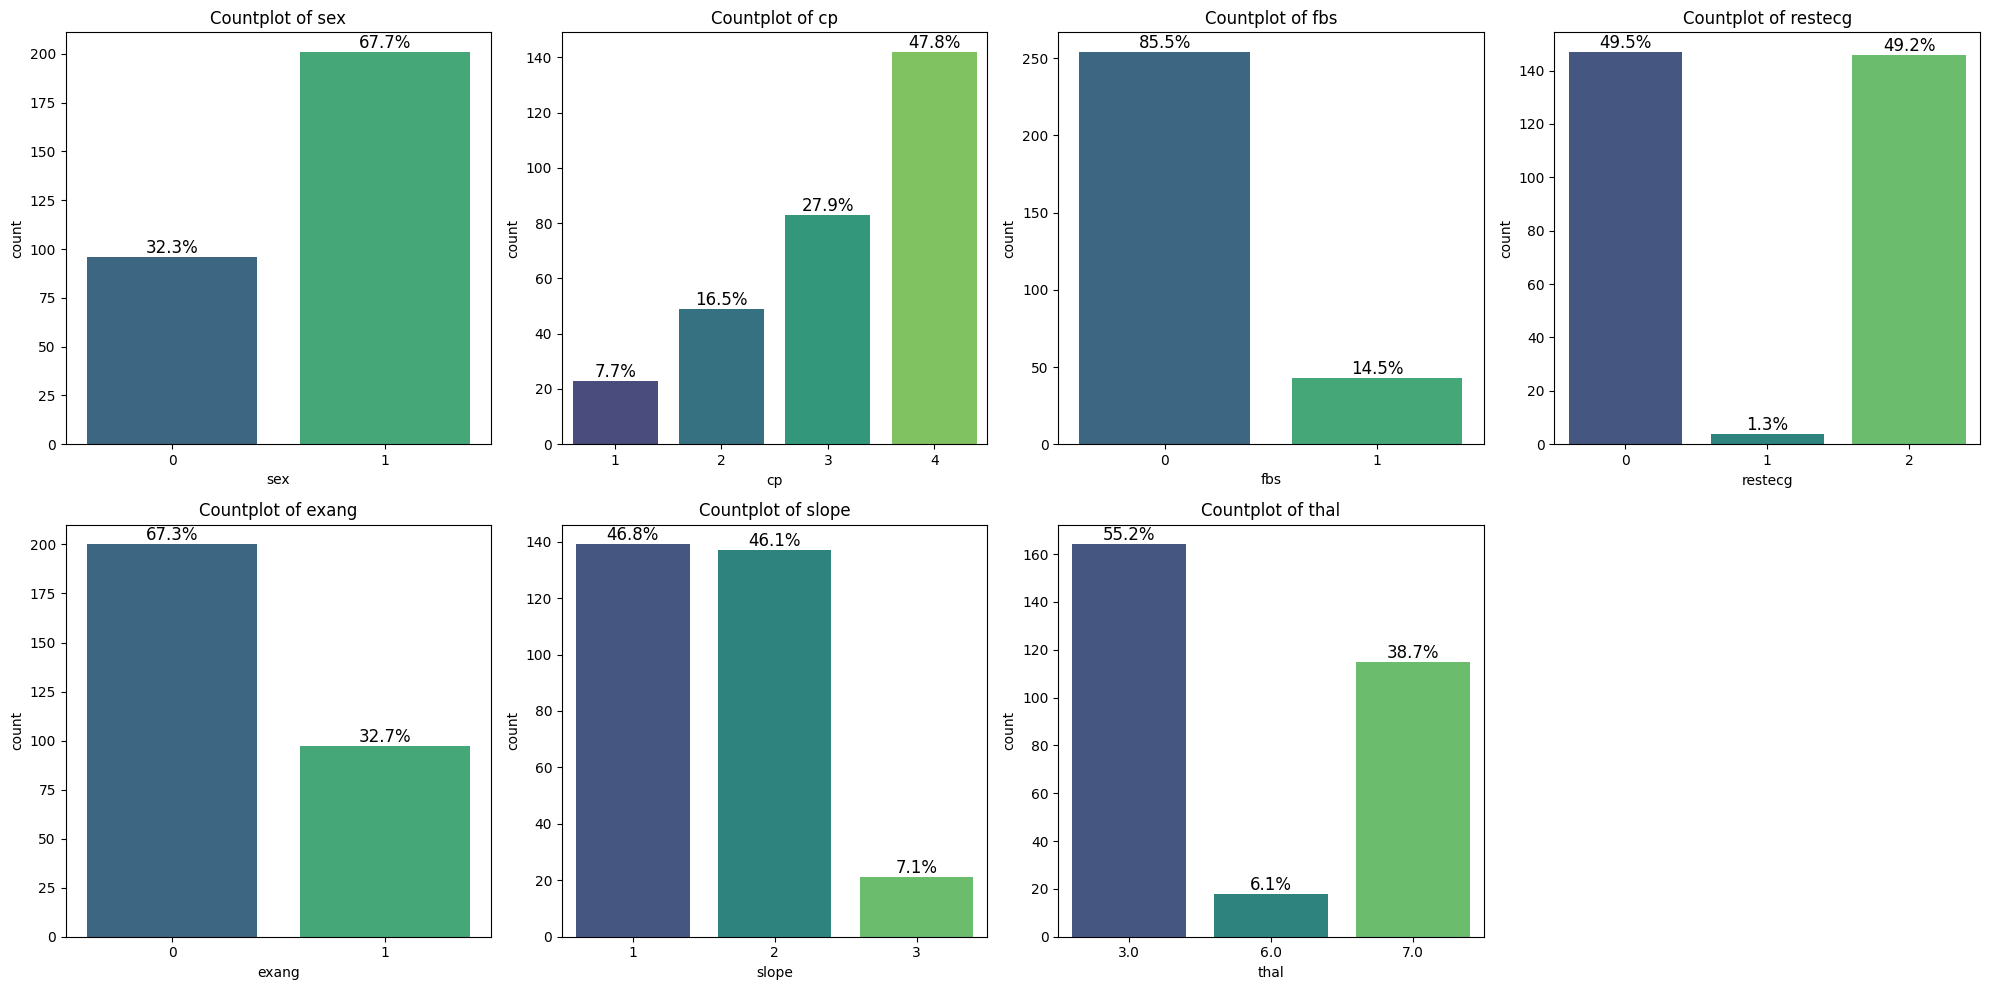

In [ ]:
# List of columns to plot
cols_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Create a 2-row, 4-column subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Loop over columns and create the count plots
for i, col in enumerate(cols_to_plot):
    row = i // 4
    col_idx = i % 4
    sns.countplot(x=col, data=heart_disease_df_cleaned, ax=axes[row, col_idx], palette="viridis", hue=col, legend=False)

    # Set title for each subplot
    axes[row, col_idx].set_title(f"Countplot of {col}")

    # Calculate percentages
    total = len(heart_disease_df_cleaned[col])
    for p in axes[row, col_idx].patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[row, col_idx].annotate(f'{percentage:.1f}%',
                                     (p.get_x() + p.get_width() / 2, height),
                                     ha='center', va='bottom', size=12)

# Remove any empty subplots if the number of plots isn't a multiple of 4
if len(cols_to_plot) % 4 != 0:
    fig.delaxes(axes[1, 3])

# Tighten layout for better spacing
plt.tight_layout()
plt.show()


# Feature Selection

Review of correlation between the features using correlation heatmap and VIF to idenitfy features than could potentially be removed.

## Mutlicolinearity

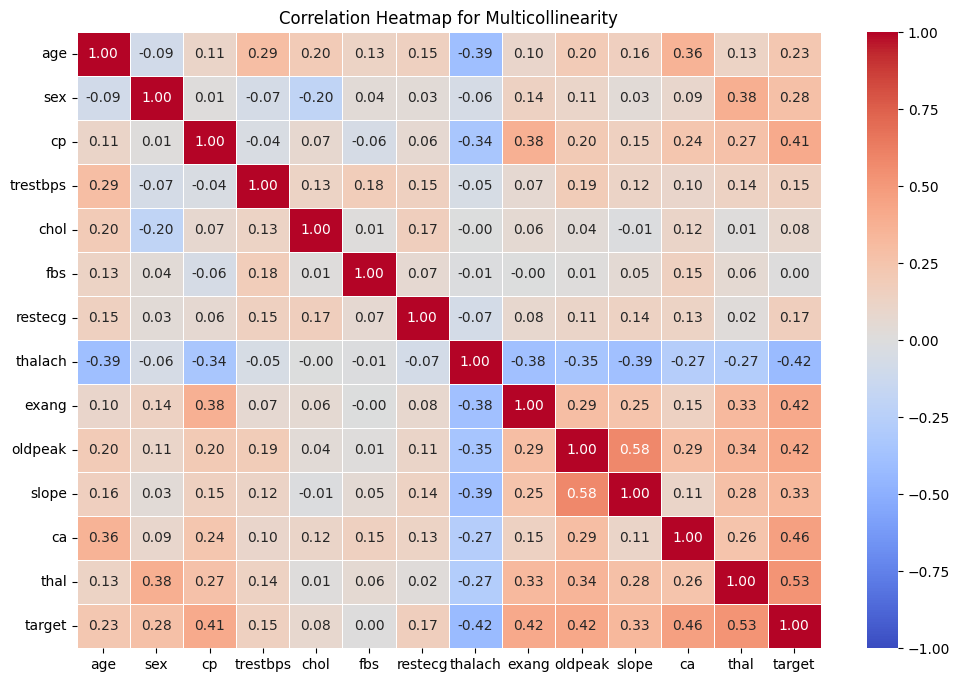





VIF Table for Dataset
     feature         VIF
0      const  252.937013
1        age    1.493954
2        sex    1.344350
3         cp    1.376939
4   trestbps    1.221465
5       chol    1.140030
6        fbs    1.088583
7    restecg    1.100544
8    thalach    1.676947
9      exang    1.412347
10   oldpeak    1.772062
11     slope    1.693815
12        ca    1.505997
13      thal    1.639568
14    target    2.146620


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate the correlation matrix

# compute correlations on the dataframe
corr_matrix = heart_disease_df_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap for Multicollinearity')
plt.show()


## Calculate the VIF

# Add a constant for the intercept term in the regression
X = add_constant(heart_disease_df_cleaned)
print('\n'*3)
print('VIF Table for Dataset')
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



## Feature Selection Interpetation and Results

All VIF values are below 5, which is generally considered acceptable. In particular, a VIF close to 1 suggests no multicollinearity, while values between 1 and 5 indicate that there is little to no multicollinearity.

The highest VIF value is for const (the intercept), which is expected and not an issue since the constant term doesn't affect the predictors' relationships.

We chose to move to binary classification to create a more balanced dataset.Next we encode the dummies.

# PreProcessing

## Encoding Categorical Features

In [ ]:

# Create dummy variables for categorical features (excluding the target)
X = heart_disease_df_cleaned.drop('target', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Now X contains dummy variables for categorical features
print(X.head())


   age  trestbps  chol  thalach  oldpeak   ca  sex_1   cp_2   cp_3   cp_4  \
0   63       145   233      150      2.3  0.0   True  False  False  False   
1   67       160   286      108      1.5  3.0   True  False  False   True   
2   67       120   229      129      2.6  2.0   True  False  False   True   
3   37       130   250      187      3.5  0.0   True  False   True  False   
4   41       130   204      172      1.4  0.0  False   True  False  False   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  thal_6.0  thal_7.0  
0   True      False       True    False    False     True      True     False  
1  False      False       True     True     True    False     False     False  
2  False      False       True     True     True    False     False      True  
3  False      False      False    False    False     True     False     False  
4  False      False       True    False    False    False     False     False  


## Hyperparameter Tuning Custom Metric

**This scorer aims to:**

- Maximize average recall across all classes

- Penalize imbalance in recall between classes (to favor fairness)


**Intuition Behind the Formula**
- The higher the average recall across classes, the better.

- The smaller the gap between the best and worst class recall, the better.

- By subtracting the gap this scorer penalizes class imbalance, which is useful for imbalanced datasets.

- If there is only one class present the scorer defaults the scorer to 0, this avoids undefined behavior from dividing by zero or misleading scores in degenerate situations.



Let:
- $(R_i)$ be the recall for class $(i)$
- $(n)$ be the number of classes
- $(\bar{R} )$ be the mean recall across classes
- $(\Delta R )$ be the difference between the maximum and minimum recall

Then:

$$
[R_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}]
$$

$$
[
\bar{R} = \frac{1}{n} \sum_{i=1}^{n} R_i
]
$$

$$
[
\Delta R = \max(R_i) - \min(R_i)
]
$$

$$
[
\text{Final Score} = \bar{R} - \Delta R
]
$$  
  
<br>
  
This scorer encourages high average recall and penalizes imbalance across class recalls.


In [ ]:
import numpy as np
from sklearn.metrics import recall_score, make_scorer

def safe_balanced_recall(y_true, y_pred):
    # Get all labels from the true set
    labels = np.unique(np.concatenate([y_true, y_pred]))

    # Compute per-class recall with consistent label set
    recalls = recall_score(y_true, y_pred, average=None, labels=labels, zero_division=0)

    # Guard against degenerate cases (e.g., only one class present)
    if len(recalls) < 2:
        return 0  # or a small value like 0.01 to avoid nan

    ## calculate the difference and use it to penalize the recall
    diff = np.max(recalls) - np.min(recalls)
    mean_recall = np.mean(recalls)
    return mean_recall - diff

# Wrap in scorer
balanced_and_high_recall = make_scorer(safe_balanced_recall, greater_is_better=True)

# Linear Models

- Logistic Regression
- Linear Discriminate Analysis (LDA)

## Logistic Regression

- data should be scaled


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Separate the features (X) and target (y)
X = heart_disease_df_cleaned.drop('target', axis=1)
y = heart_disease_df_cleaned['target']

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.85      0.83      0.84        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



### Log Reg Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## using the same data from previous

# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2', 'none'],             # Regularization method (L2 or no regularization)
    'C': [0.01, 0.1, 1, 10, 100],          # Inverse of regularization strength; smaller values mean more regularization
    'solver': ['lbfgs', 'liblinear'],      # Optimization algorithm (liblinear is good for small datasets)
    'max_iter': [100, 500, 1000]           # Max iterations for optimization algorithm
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           cv=5,
                           scoring=balanced_and_high_recall,  # You can change to another metric, such as 'f1' or 'roc_auc'
                           verbose=1,            # To see progress of GridSearch
                           n_jobs=-1,              # Use all processors
                           error_score=np.nan)      #yes yes we know that some of them failed and I'm not about to chase this down

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best estimator from the grid search
best_logreg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.83      0.86      0.85        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_logreg, X_scaled, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.83333333 0.8        0.83333333 0.93333333 0.9        0.8
 0.83333333 0.89655172 0.72413793 0.86206897]
Mean CV Score: 0.8416091954022988
Standard Deviation of CV Scores: 0.05720813326176685


## Linear Discriminate Analysis
- parametric (assumes normality) but not all of our features are normal, but most are
- works best with continous (we also don't have that many are encoded cateogrical) but CAN work with categorical so we will try it
- requires scaling
- assumes covariances is homogenous (need to check this, how to test it?)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = lda_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.85      0.83      0.84        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



### LDA Hyperparameter Tuning

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


param_grid = [
    {
        'solver': ['svd'],  # svd doesn't support shrinkage
        'priors': ['uniform', 'class_count', None],
        'n_components': [1, 2, 3, 4]
    },
    {
        'solver': ['lsqr'],
        'shrinkage': ['auto', 0.1, 0.5, 1.0],
        'priors': ['uniform', 'class_count', None],
        'n_components': [1, 2, 3, 4]
    },
    {
        'solver': ['eigen'],
        'shrinkage': ['auto', 0.1, 0.5, 1.0],
        'priors': ['uniform', 'class_count', None],
        'n_components': [1, 2, 3, 4]
    }
]

# Create a LinearDiscriminantAnalysis model
lda_model = LinearDiscriminantAnalysis()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lda_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring= balanced_and_high_recall,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Make predictions on the scaled test set using the best model
best_lda_model = grid_search.best_estimator_
y_pred = best_lda_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print a classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'n_components': 1, 'priors': None, 'shrinkage': 1.0, 'solver': 'lsqr'}
Test Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        40
           1       0.80      0.80      0.80        35

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.81      0.81      0.81        75



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
495 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_lda_model, X_scaled, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.8        0.8        0.83333333 0.9        0.9        0.8
 0.83333333 0.82758621 0.72413793 0.79310345]
Mean CV Score: 0.8211494252873563
Standard Deviation of CV Scores: 0.04930806735892161


# Decision Trees
- CART

## CART
- No need to scale
- Can handle categoricals
- manipulate the impurities

Logistic regression is highly overfit

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# Create and train the decision tree model without pruning
dt_model_unpruned = DecisionTreeClassifier(random_state=42)
dt_model_unpruned.fit(X_train, y_train)

# Make predictions on the test set without pruning
y_pred_unpruned = dt_model_unpruned.predict(X_test)

# Evaluate the model without pruning
print("Classification Report (Without Pruning):")
accuracy = accuracy_score(y_test, y_pred_unpruned)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_unpruned))

Classification Report (Without Pruning):
Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.77      0.66      0.71        35

    accuracy                           0.75        75
   macro avg       0.75      0.74      0.74        75
weighted avg       0.75      0.75      0.74        75



### CART Hyperparameter Tuning


| Hyperparameter       | Description                                                                 | Typical Values / Tips                                 |
|----------------------|-----------------------------------------------------------------------------|--------------------------------------------------------|
| `max_depth`          | Maximum depth of the tree                                                   | 3, 5, 10, 15, 20, None (unlimited)                     |
| `min_samples_split`  | Minimum number of samples required to split an internal node                | 2, 5, 10, 20                                           |
| `min_samples_leaf`   | Minimum number of samples required at a leaf node                           | 1, 2, 5, 10                                            |
| `max_features`       | Number of features to consider when looking for the best split              | `'sqrt'`, `'log2'`, None, or an integer value         |
| `criterion`          | Function to measure the quality of a split                                  | `'gini'`, `'entropy'`                                  |
| `splitter`           | Strategy used to choose the split at each node                              | `'best'` (default), `'random'`                         |


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Create DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring=balanced_and_high_recall,
                           n_jobs=-1,
                           verbose=2)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and results
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'max_depth': 10, 'max_features': None, 'min_samples_split': 2}
Best cross-validation score: 0.7139285714285714
Test Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.77      0.66      0.71        35

    accuracy                           0.75        75
   macro avg       0.75      0.74      0.74        75
weighted avg       0.75      0.75      0.74        75



In [ ]:
## pruned as basically unpruned
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# Create and train the decision tree model without pruning
dt_model_test = DecisionTreeClassifier(random_state=42, max_depth = 3)
dt_model_test.fit(X_train, y_train)

# Make predictions on the test set without pruning
y_pred_pprune = dt_model_test.predict(X_test)

# Evaluate the model without pruning
print("Classification Report (Random Selection):")
accuracy = accuracy_score(y_test, y_pred_unpruned)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_unpruned))

Classification Report (Random Selection):
Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.77      0.66      0.71        35

    accuracy                           0.75        75
   macro avg       0.75      0.74      0.74        75
weighted avg       0.75      0.75      0.74        75



In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_dt, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.8        0.8        0.8        0.76666667 0.83333333 0.7
 0.53333333 0.68965517 0.72413793 0.75862069]
Mean CV Score: 0.7405747126436781
Standard Deviation of CV Scores: 0.08225750261641263


## Random Forest
- no need to scale
- prone to overfitting

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target (y)
X = heart_disease_df_cleaned.drop(['target'], axis=1)  # Exclude target
y = heart_disease_df_cleaned['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=9
                                , random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.84      0.89      0.86        35

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



### RF Hyperparameter Tuning

| Parameter           | Description                              | Default              | Typical Range / Tips                                                |
|---------------------|------------------------------------------|----------------------|----------------------------------------------------------------------|
| `n_estimators`      | Number of trees in the forest            | 100                  | Start with 100–500; more trees usually = better but slower          |
| `max_depth`         | Maximum depth of each tree               | None (grow fully)    | Try values like 5, 10, 20, etc.; helps prevent overfitting          |
| `min_samples_split` | Minimum samples to split a node          | 2                    | Try 2, 5, 10; higher = more conservative tree                        |
| `min_samples_leaf`  | Minimum samples at a leaf node           | 1                    | Try 1, 2, 5, 10; higher = smoother model                             |
| `max_features`      | Max features considered at each split    | "sqrt"               | Try "sqrt", "log2", or a fixed number like 3                        |
| `bootstrap`         | Whether to use bootstrapping             | True                 | Set to `False` for Pasting (sampling without replacement)           |



In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 8, 9],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring=balanced_and_high_recall, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 8}
Best Cross-Validation Score: 0.7340476190476191
Test Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.84      0.74      0.79        35

    accuracy                           0.81        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.82      0.81      0.81        75



In [ ]:
# Perform cross-validation
## scaling not needed
cv_scores = cross_val_score(best_rf_model, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.83333333 0.7        0.93333333 0.9        0.86666667 0.66666667
 0.63333333 0.75862069 0.68965517 0.86206897]
Mean CV Score: 0.784367816091954
Standard Deviation of CV Scores: 0.1020715542801044


## Boosted Random Forest

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Boosted Random Forest model
brf_model = GradientBoostingClassifier(n_estimators=8, random_state=42)
brf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = brf_model.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred),2)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        40
           1       0.79      0.63      0.70        35

    accuracy                           0.75        75
   macro avg       0.75      0.74      0.74        75
weighted avg       0.75      0.75      0.74        75



## Bagged Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier


# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=8, random_state=42)

# Create a Bagging Classifier with the Random Forest as the base estimator
bagging_rf_model = BaggingClassifier(estimator=rf_model, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.86      0.86      0.86        35

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



# KNN
- Data must be scaled
- Encode the categorical data
- Might have too many categoricals



| Hyperparameter | Description                                                                 | Typical Values                               |
|----------------|-----------------------------------------------------------------------------|----------------------------------------------|
| `n_neighbors`  | Number of neighbors to use                                                  | 1 to 30                                       |
| `weights`      | Weight function used in prediction                                          | `'uniform'` (equal weight), `'distance'` (closer neighbors have more influence) |
| `metric`       | Distance metric used                                                        | `'euclidean'`, `'manhattan'`, `'minkowski'`  |
| `p`            | Power parameter for Minkowski metric (`p=1`: Manhattan, `p=2`: Euclidean)   | 1, 2                                          |



### KNN hyperparameters Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=balanced_and_high_recall, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model and evaluation
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluate on test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.72
Test Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.83      0.83      0.83        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_scaled, y, cv=7)

print("Cross validation on Best parameters found:", grid_search.best_params_)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross validation on Best parameters found: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Cross-Validation Scores: [0.81395349 0.76744186 0.88372093 0.80952381 0.73809524 0.78571429
 0.83333333]
Mean CV Score: 0.8045404208194905
Standard Deviation of CV Scores: 0.04368346162417723


# Neural Network - unsupervised

1.   List item
2.   List item



- Requires scaling
- Categorical needs to be encoded
- Requires tuning
- possible overfitting

In [ ]:
## Neural Net intial run

from sklearn.neural_network import MLPClassifier


# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.79      0.89      0.84        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.85      0.84      0.84        75



### NN Hyperparameter Tuning

In [ ]:
# Tune hyperparamters for NN

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64,), (100,), (64, 32), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}

mlp = MLPClassifier(max_iter=500, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=balanced_and_high_recall, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_mlp, X_scaled, y, cv=7)

print("Cross validation on Best parameters found:", grid_search.best_params_)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

# Support Vector Machine Learning
- needs to be scaled
- categoricals should be encoded, one hot preferred
- can be slow with large datasets (ours is not large)


In [ ]:
from sklearn.svm import SVC

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


## SVM Hyperparamter Tuning

In [ ]:
from sklearn.svm import SVC

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.01, 0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }
]

# Create SVC model
svm = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           scoring= balanced_and_high_recall ,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate on test set
best_svc_model = grid_search.best_estimator_
y_pred = best_svc_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_svc_model, X_scaled, y, cv=7)

print("Cross validation on Best parameters found:", grid_search.best_params_)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())